In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 30.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import os
import re
import csv
import numpy as np
import pandas as pd

In [ ]:
print(os.listdir("/content/drive/MyDrive/unzipped"))

['sample_submission.csv', 'train.csv', 'test.csv', 'glove.6B.200d.txt.zip', 'glove.6B.200d.txt', 'Stack Overflow']


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/unzipped/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/unzipped/test.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
# train_df = train_df.sample(frac=0.1).reset_index(drop=True)
# test_df = test_df.sample(frac=0.1).reset_index(drop=True)

In [ ]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
train_df.shape, test_df.shape

((404290, 6), (3563475, 3))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


matplotlib: 3.6.2


[Text(0, 0, '255027'), Text(0, 0, '149263')]

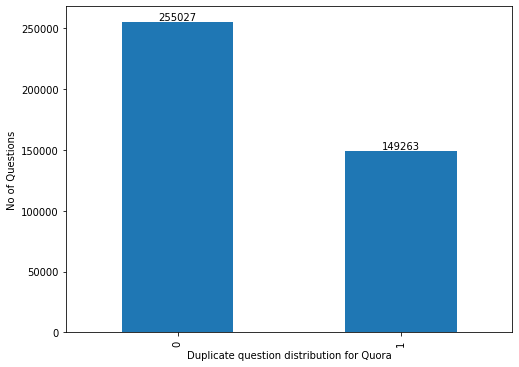

In [ ]:
ax = train_df['is_duplicate'].value_counts().plot(kind='bar',figsize=(8, 6))
x_labels = ['non-duplicate', 'duplicate']

ax.set_xlabel('Duplicate question distribution for Quora')
ax.set_ylabel('No of Questions')
ax.bar_label(ax.containers[0], label_type='edge')
# ax.set_xticklabels(x_labels)

In [ ]:
# Missing values present in the columns
def get_missing_values(df):
  print("Missing Values\n--------------")
  for col in df.columns:
    print("Column " + col + ' -- ' + str(sum(df[col].isna())))

get_missing_values(train_df)

Missing Values
--------------
Column id -- 0
Column qid1 -- 0
Column qid2 -- 0
Column question1 -- 1
Column question2 -- 2
Column is_duplicate -- 0


In [ ]:
#Dropping the rows that have missing values

train_df = train_df.dropna()

In [ ]:
train_df[train_df['is_duplicate']==1].shape,train_df[train_df['is_duplicate']==0].shape,

((149263, 6), (255024, 6))

In [ ]:
is_duplicate = train_df[train_df['is_duplicate']==1]
not_duplicate = train_df[train_df['is_duplicate']==0].sample(149263)

In [ ]:
len(is_duplicate),len(not_duplicate)

(149263, 149263)

In [ ]:
train_data = pd.concat([is_duplicate,not_duplicate])

In [ ]:
train_data.shape

(298526, 6)

In [ ]:
train_data = train_data.sample(frac=1).reset_index(drop=True)
train_data.shape

(298526, 6)

In [ ]:
train_data

,id,qid1,qid2,question1,question2,is_duplicate
0,339686,467343,251399,What type of image is formed by mirage or loom...,A ray diagram for concave mirror shows no imag...,0
1,140990,70080,223935,Could 'The Thing' lift Thor's hammer?,Did Superman lift Thor's hammer?,0
2,35915,65560,65561,Is it normal to fantasize your wife having sex...,Is it normal to fantasize about watching my wi...,1
3,391998,10009,441085,How widely accepted are credit cards at small ...,How widely accepted are credit cards at small ...,0
4,15229,26031,29112,Why doesn't Apple launch a dual SIM iPhone?,Would you like a dual sim Iphone? Why doesn't ...,1
...,...,...,...,...,...,...
298521,55787,98310,98311,Cans somebody please list all the things that ...,What are some all in one tools for executing c...,0
298522,214875,13239,224802,How do you become immortal?,"If you could, would you become immortal? Why?",0
298523,336350,187936,2765,Why does Arnav Goswami resign from Times Now e...,Why did Arnab Goswami resign as the Editor-in-...,1
298524,42720,39989,21754,What is most important thing in life? Can we c...,"Are money, time, and friends the most importan...",1


<AxesSubplot: >

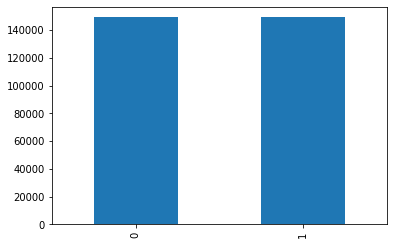

In [ ]:
train_data.is_duplicate.value_counts().plot(kind='bar')

In [ ]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,158127,120172,247084,Why did Kobe Bryant change his number from 8 t...,Did Kobe Bryant deserve the 2006-2007 NBA MVP ...,0
1,125299,202158,202159,How is a mole fraction calculated?,How do I calculate mole fraction?,1
2,375990,507090,507091,Donald Trump attacks China again! Tonight he s...,Will Donald Trump attack North Korea if he is ...,0
3,375026,165057,11845,Which one should I believe? Science or my reli...,Should I believe in science or religion?,1
4,162918,109672,253537,How does WhatsApp make profit?,How does WhatsApp make profit even though it d...,1


In [ ]:
# Checking how many questions are repeated

def get_repeated_questions(df,q1_id_column,q2_id_column):
  # Fuctions displays how many times the questions were repeated in the dataset. 

  all_qid = pd.Series(df[q1_id_column].tolist() + df[q2_id_column].tolist())

  print('Number of unique questions by ID - ',np.unique(all_qid).shape[0])

  x = all_qid.value_counts()>1
  print('Number of duplicate questions getting repeated by ID - ',x[x].shape[0])

get_repeated_questions(train_data,'qid1','qid2')

Number of unique questions by ID -  390904
Number of duplicate questions getting repeated by ID -  79134


In [ ]:
all_qid = pd.Series(train_data['qid1'].tolist() + train_data['qid2'].tolist())
all_qid.head()

0    396524
1    487227
2    363300
3    307888
4    354735
dtype: int64

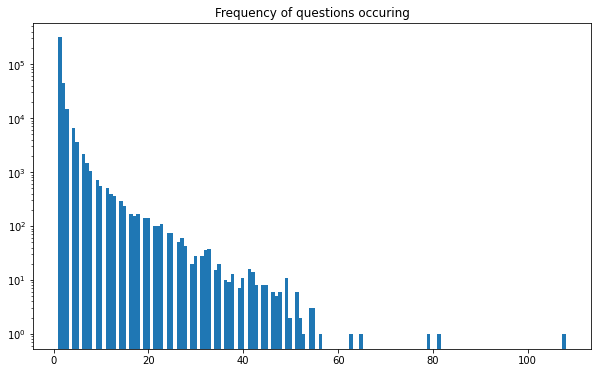

In [ ]:
# Plotting the histogram for questions that are occuring - how many times one questions has occured in the dataset
import matplotlib.pyplot as plt 

def plot_dup_ques_hist(df,q1_id_column,q2_id_column):
  all_qid = pd.Series(df[q1_id_column].tolist() + df[q2_id_column].tolist())

  plt.figure(figsize=(10,6))
  plt.hist(all_qid.value_counts().values,bins=150)
  plt.yscale('log')
  plt.title("Frequency of questions occuring")
  plt.show()

plot_dup_ques_hist(train_data,'qid1','qid2')

In [ ]:
# There is one question in the dataset that has been repeated around ~160 times. 

First approach is to try machine learning algorithms on a sample of 25000 records without doing any Feature Engineering. Just to check how many accuracy comes with basic ML algorithm with minimal tuning


In [ ]:
basic_data = train_data.sample(25000,random_state=101)

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer


# Merge all the question into one list
questions = list(basic_data['question1']) + list(basic_data['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
questions[0]

'How well are the Spanish solar towers performing?'

In [ ]:
cv.transform([questions[0]]).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:

temp_df1 = pd.DataFrame(q1_arr, index= basic_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= basic_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

#temp_df will have 6000 numerical features now, 3000 for question1 and another 3000 for question2

(25000, 6000)

In [ ]:
temp_df['is_duplicate'] = basic_data['is_duplicate']

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
125116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
128564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
257071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
125116,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=101)

NameError: ignored

In [ ]:
# Creating a basic Random Forest Classifier and verifying how it performs without much feature engineering and just on Numberical Features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_model = RandomForestClassifier()
random_model.fit(X_train,y_train)

y_pred = random_model.predict(X_test)
print("The accuracy using Random Forest Classifier is %f" %accuracy_score(y_test,y_pred))

NameError: ignored

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

print("The accuracy using Random XGB Classifier is %f" %accuracy_score(y_test,y_pred))

NameError: ignored

After reading solutions from the literature papers, it is suggested to apply feature engineering and create more features in order to gain higher accuarcy. Moving from here, we will apply feature engineering and create more features for the dataset

In [ ]:
get_repeated_questions(basic_data,'qid1','qid2')

Number of unique questions by ID -  45348
Number of duplicate questions getting repeated by ID -  3288


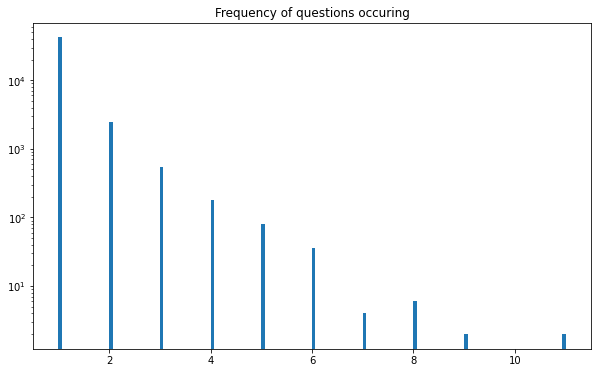

In [ ]:
plot_dup_ques_hist(basic_data,'qid1','qid2')

In [ ]:
# Feature engineering to contruct new features 

# Storing the length of question 1 and question 2
basic_data['q1len'] = basic_data['question1'].str.len()
basic_data['q2len'] = basic_data['question2'].str.len()

In [ ]:
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len
125116,72886,125152,125153,How well are the Spanish solar towers performing?,How do commercial mirror solar systems work? H...,0,49,115
91957,235185,63603,165636,What should be the first programming language ...,What are all the coding languages I should lea...,1,91,140
128564,217591,323991,196726,How do spiders make web?,How does the spider make its web?,1,24,33
257071,269769,125593,56990,How do you tell if you have a bad inner tie rod?,How do I know if my battery or alternator is bad?,0,48,49
131680,9054,15349,17616,What's the best programming language to learn ...,What is a good first programming language to l...,1,54,51


In [ ]:
# Storing the no of words present in the questions 
basic_data['q1_no_words'] = basic_data['question1'].apply(lambda row: len(row.split(" ")))
basic_data['q2_no_words'] = basic_data['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_no_words,q2_no_words
125116,72886,125152,125153,How well are the Spanish solar towers performing?,How do commercial mirror solar systems work? H...,0,49,115,8,22
91957,235185,63603,165636,What should be the first programming language ...,What are all the coding languages I should lea...,1,91,140,17,28
128564,217591,323991,196726,How do spiders make web?,How does the spider make its web?,1,24,33,5,7
257071,269769,125593,56990,How do you tell if you have a bad inner tie rod?,How do I know if my battery or alternator is bad?,0,48,49,12,11
131680,9054,15349,17616,What's the best programming language to learn ...,What is a good first programming language to l...,1,54,51,9,9


In [ ]:
def fetch_common_words(row,col1,col2):
    w1 = set(map(lambda word: word.lower().strip(), row[col1].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row[col2].split(" ")))    
    return len(w1 & w2)

In [ ]:
basic_data['common_words'] = basic_data.apply(fetch_common_words,args=('question1','question2'), axis=1)
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words
28964,376689,507879,507880,How do you clear the clipboard in Windows 8?,How do you clear clipboard on Windows 7?,0,44,40,9,8,6
272513,121818,197314,197315,Why can India not arrest Vijay Mallya?,If circular disc and circular of same mass and...,0,38,132,7,25,0
112740,166845,258784,87961,What are some unexpected things first-time vis...,What are some unexpected things first-time vis...,0,69,72,10,10,9
106199,109530,179749,179750,"Which language is more worth learning, Java or...",Which is better learning Java or python?,1,54,40,9,7,5
175245,243820,30925,356328,Is India still considered to be a third world ...,Can India be powerful being a third world coun...,0,54,50,10,9,6


In [ ]:
def total_words(row,col1,col2):
    w1 = set(map(lambda word: word.lower().strip(), row[col1].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row[col2].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
basic_data['total_words'] = basic_data.apply(total_words, args=('question1','question2'), axis=1)
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words
28964,376689,507879,507880,How do you clear the clipboard in Windows 8?,How do you clear clipboard on Windows 7?,0,44,40,9,8,6,17
272513,121818,197314,197315,Why can India not arrest Vijay Mallya?,If circular disc and circular of same mass and...,0,38,132,7,25,0,28
112740,166845,258784,87961,What are some unexpected things first-time vis...,What are some unexpected things first-time vis...,0,69,72,10,10,9,20
106199,109530,179749,179750,"Which language is more worth learning, Java or...",Which is better learning Java or python?,1,54,40,9,7,5,16
175245,243820,30925,356328,Is India still considered to be a third world ...,Can India be powerful being a third world coun...,0,54,50,10,9,6,19


In [ ]:
basic_data['shared_words'] = round(basic_data['common_words']/basic_data['total_words'],2)
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,word_share,shared_words
125116,72886,125152,125153,How well are the Spanish solar towers performing?,How do commercial mirror solar systems work? H...,0,49,115,8,22,3,25,0.12,0.12
91957,235185,63603,165636,What should be the first programming language ...,What are all the coding languages I should lea...,1,91,140,17,28,11,37,0.30,0.30
128564,217591,323991,196726,How do spiders make web?,How does the spider make its web?,1,24,33,5,7,3,12,0.25,0.25
257071,269769,125593,56990,How do you tell if you have a bad inner tie rod?,How do I know if my battery or alternator is bad?,0,48,49,12,11,3,22,0.14,0.14
131680,9054,15349,17616,What's the best programming language to learn ...,What is a good first programming language to l...,1,54,51,9,9,3,18,0.17,0.17


Doing some basic analysis for the newly created features in the dataset inorder 
to understand how the new data looks.

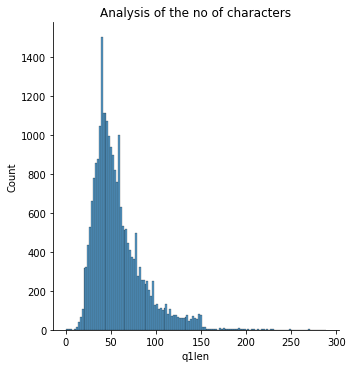

In [ ]:
import seaborn as sns

def plot_no_of_characters(df,col_name):
  sns.displot(basic_data[col_name]).set(title='Analysis of the no of characters')

plot_no_of_characters(basic_data,'q1len')

In [ ]:
def get_characters_agg(df,col_name):
  print('Minimum characters present in Question - ',df[col_name].min())
  print('Maximum characters present in Question - ',df[col_name].max())
  print('Average num of characters in Question - ', df[col_name].mean())

get_characters_agg(basic_data,'q1len')

Minimum characters present in Question -  1
Maximum characters present in Question -  288
Average num of characters in Question -  58.03244


In [ ]:
get_characters_agg(basic_data,'q2len')

Minimum characters present in Question -  3
Maximum characters present in Question -  1169
Average num of characters in Question -  58.68976


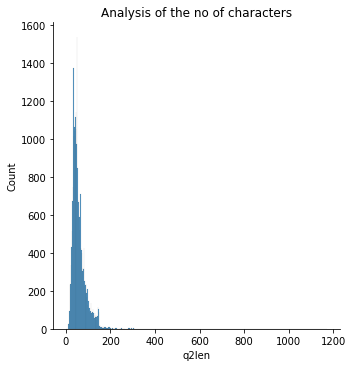

In [ ]:
plot_no_of_characters(basic_data, 'q2len')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


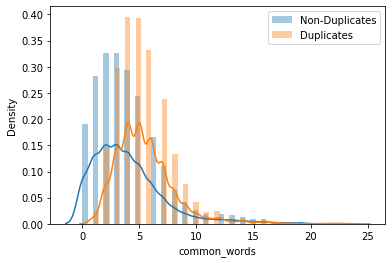

In [ ]:
# Plotting a chart for common words in the Data

sns.distplot(basic_data[basic_data['is_duplicate'] == 0]['common_words'],label='Non-Duplicates')
sns.distplot(basic_data[basic_data['is_duplicate'] == 1]['common_words'],label='Duplicates')
plt.legend()
plt.show()

From the above chart it is clear that if there are less than 0.4 - 4 common words between the questions, then the chances of that being a non-duplicate question is very high.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


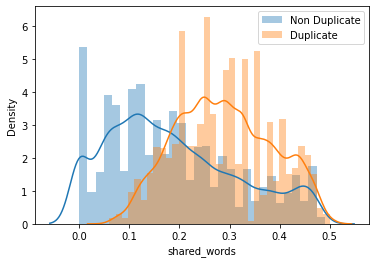

In [ ]:
# Plotting a displot for both the questions that share the words 

sns.distplot(basic_data[basic_data['is_duplicate'] == 0]['shared_words'],label='Non Duplicate')
sns.distplot(basic_data[basic_data['is_duplicate'] == 1]['shared_words'],label='Duplicate')
plt.legend()
plt.show()

If the word share between the two questions is > 0.2 (2 words), then the chances of that being a duplicate question is very high else it is normally a dnon-duplicate question

In [ ]:
all_questions = list(basic_data['question1']) + list(basic_data['question2'])

In [ ]:
# Dropping the questions, their ID's since we won't be using them anymore. We will convert them into numerical features and feed em to the our models. 

basic_data = basic_data.drop(columns=['id','qid1','qid2','question1','question2'])
basic_data.head()

,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words
28964,0,44,40,9,8,6,17
272513,0,38,132,7,25,0,28
112740,0,69,72,10,10,9,20
106199,1,54,40,9,7,5,16
175245,0,54,50,10,9,6,19


In [ ]:
print(basic_data.shape)


(25000, 8)


In [ ]:
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(all_questions).toarray(),2)

In [ ]:
# We retain the index of the dataset, because later while merging the numerical features we will need the index as reference for concatenation
temp_df1 = pd.DataFrame(q1_arr, index= basic_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= basic_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)


In [ ]:
temp_df.shape

(25000, 6000)

In [ ]:
basic_data = pd.concat([basic_data, temp_df], axis=1)
print(basic_data.shape)


(25000, 6007)


In [ ]:
basic_data.head()

,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,0,1,2,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
28964,0,44,40,9,8,6,17,0,0,0,...,0,0,0,1,0,0,0,0,0,0
272513,0,38,132,7,25,0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112740,0,69,72,10,10,9,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106199,1,54,40,9,7,5,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175245,0,54,50,10,9,6,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(basic_data.iloc[:,1:].values,basic_data.iloc[:,0].values,test_size=0.2,random_state=101)

In [ ]:
random_model = RandomForestClassifier()
random_model.fit(X_train,y_train)
y_pred = random_model.predict(X_test)

print("The accuracy using Random Forest Classifier is %f" %accuracy_score(y_test,y_pred))

The accuracy using Random Forest Classifier is 0.759600


In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print("The accuracy using XGB Classifier is %f" %accuracy_score(y_test,y_pred))

The accuracy using XGB Classifier is 0.741800


In [ ]:
import re
from bs4 import BeautifulSoup


def preprocess_data(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [ ]:
preprocess_data("Deepak hasn't yet arrived yet. He will be going out tomorrow")

'deepak has not yet arrived yet  he will be going out tomorrow'

In [ ]:
basic_data = train_data.sample(25000,random_state=101)

In [ ]:
basic_data['question1'] = basic_data['question1'].apply(preprocess_data)
basic_data['question2'] = basic_data['question2'].apply(preprocess_data)

In [ ]:
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
297020,254691,266344,369469,what is the best short story ever written,what are the best short stories you have written,0
16205,257364,78909,294847,how many calories should i consume each day fo...,how many calories per day should i eat to lose...,1
228099,399704,162801,533002,where is the best us website to buy single mal...,what is the best website to buy single malt sc...,1
293071,336700,464095,330248,how is the work culture,how is work culture,1
206598,159807,249394,249395,why did slavery happen,how does slavery happen,1


In [ ]:
# Storing the length of question 1 and question 2
basic_data['q1len'] = basic_data['question1'].str.len()
basic_data['q2len'] = basic_data['question2'].str.len()

# Storing the no of words present in the questions 
basic_data['q1_no_words'] = basic_data['question1'].apply(lambda row: len(row.split(" ")))
basic_data['q2_no_words'] = basic_data['question2'].apply(lambda row: len(row.split(" ")))

basic_data['common_words'] = basic_data.apply(fetch_common_words,args=('question1','question2'), axis=1)
basic_data.head()

basic_data['total_words'] = basic_data.apply(total_words, args=('question1','question2'), axis=1)
basic_data.head()

basic_data['shared_words'] = round(basic_data['common_words']/basic_data['total_words'],2)
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,shared_words
297020,254691,266344,369469,what is the best short story ever written,what are the best short stories you have written,0,41,48,8,9,5,17,0.29
16205,257364,78909,294847,how many calories should i consume each day fo...,how many calories per day should i eat to lose...,1,59,53,11,11,7,22,0.32
228099,399704,162801,533002,where is the best us website to buy single mal...,what is the best website to buy single malt sc...,1,61,57,12,11,10,23,0.43
293071,336700,464095,330248,how is the work culture,how is work culture,1,23,19,5,4,4,9,0.44
206598,159807,249394,249395,why did slavery happen,how does slavery happen,1,22,23,4,4,2,8,0.25


Advanced Feature Engineering starts from here. 

In [ ]:
[0.0]*8

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [ ]:
token_feature_engineering = basic_data.head(2).apply(fetch_token_features, axis=1)


In [ ]:
print(token_feature_engineering.values[0])

[0.7499812504687383, 0.5999880002399952, 0.6666444451851604, 0.3999920001599968, 0.6249921875976551, 0.5555493827846357, 1, 1]


In [ ]:
token_feature_engineering = basic_data.apply(fetch_token_features, axis=1)


basic_data["common_words_min"] = list(map(lambda x: x[0], token_feature_engineering))
basic_data["common_words_max"] = list(map(lambda x: x[1], token_feature_engineering))
basic_data["common_stop_min"] = list(map(lambda x: x[2], token_feature_engineering))
basic_data["common_stop_max"]  = list(map(lambda x: x[3], token_feature_engineering))
basic_data["common_token_min"]  = list(map(lambda x: x[4], token_feature_engineering))
basic_data["common_token_max"]  = list(map(lambda x: x[5], token_feature_engineering))
basic_data["last_word_equal"] = list(map(lambda x: x[6], token_feature_engineering))
basic_data["first_word_equal"] = list(map(lambda x: x[7], token_feature_engineering))

In [ ]:
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,...,total_words,shared_words,common_words_min,common_words_max,common_stop_min,common_stop_max,common_token_min,common_token_max,last_word_equal,first_word_equal
297020,383075,514987,142213,did the early u s presidents write their own ...,when did u s presidents start outsourcing the...,1,89,72,19,13,...,30,0.30,0.499992,0.428565,0.833319,0.555549,0.666661,0.470585,0,0
16205,20957,39497,39498,how do i add content on quora,how do you add a link on quora,0,29,30,7,8,...,15,0.33,0.666644,0.666644,0.749981,0.599988,0.714276,0.624992,1,1
228099,65553,2920,11343,how does banning 500 1k rupee notes solve bl...,how can black money brought out by discontinui...,1,63,65,13,12,...,24,0.25,0.714276,0.555549,0.499975,0.199996,0.545450,0.499996,0,1
293071,335821,370387,81841,what are the tips and hacks for getting the cl...,what are the tips and hacks for getting the cl...,0,96,94,19,19,...,36,0.47,0.874989,0.874989,0.999990,0.999990,0.894732,0.894732,1,1
206598,164356,33063,198542,what are the best books for iit jam math and w...,what are the best books for practicing for the...,1,86,64,17,13,...,24,0.38,0.714276,0.714276,0.999975,0.666656,0.692302,0.529409,0,1


In [ ]:
!pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import distance

def get_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    feature_length = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return feature_length
    
    # Absolute length features
    feature_length[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    feature_length[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    feature_length[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return feature_length

In [ ]:
length_features = basic_data.apply(get_length_features, axis=1)

basic_data['abs_length'] = list(map(lambda x: x[0], length_features))
basic_data['mean_length'] = list(map(lambda x: x[1], length_features))
basic_data['longest_substring_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
fuzzy_features = basic_data.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
basic_data['fuzzy_ratio'] = list(map(lambda x: x[0], fuzzy_features))
basic_data['fuzzy_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
basic_data['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
basic_data['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
print(basic_data.shape)

(25000, 28)


In [ ]:
basic_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,...,common_token_max,last_word_equal,first_word_equal,abs_length,mean_length,longest_substring_ratio,fuzzy_ratio,fuzzy_partial_ratio,token_sort_ratio,token_set_ratio
297020,254691,266344,369469,what is the best short story ever written,what are the best short stories you have written,0,41,48,8,9,...,0.555549,1.0,1.0,1.0,8.5,0.476190,83,79,79,83
16205,257364,78909,294847,how many calories should i consume each day fo...,how many calories per day should i eat to lose...,1,59,53,11,11,...,0.636358,0.0,1.0,0.0,11.0,0.333333,70,70,79,82
228099,399704,162801,533002,where is the best us website to buy single mal...,what is the best website to buy single malt sc...,1,61,57,12,11,...,0.833326,1.0,0.0,1.0,11.5,0.706897,93,93,93,95
293071,336700,464095,330248,how is the work culture,how is work culture,1,23,19,5,4,...,0.799984,1.0,1.0,1.0,4.5,0.650000,90,79,90,100
206598,159807,249394,249395,why did slavery happen,how does slavery happen,1,22,23,4,4,...,0.499988,1.0,0.0,0.0,4.0,0.652174,80,84,71,80


In [ ]:
basic_data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'q1len',
       'q2len', 'q1_no_words', 'q2_no_words', 'common_words', 'total_words',
       'shared_words', 'common_words_min', 'common_words_max',
       'common_stop_min', 'common_stop_max', 'common_token_min',
       'common_token_max', 'last_word_equal', 'first_word_equal', 'abs_length',
       'mean_length', 'longest_substring_ratio', 'fuzzy_ratio',
       'fuzzy_partial_ratio', 'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

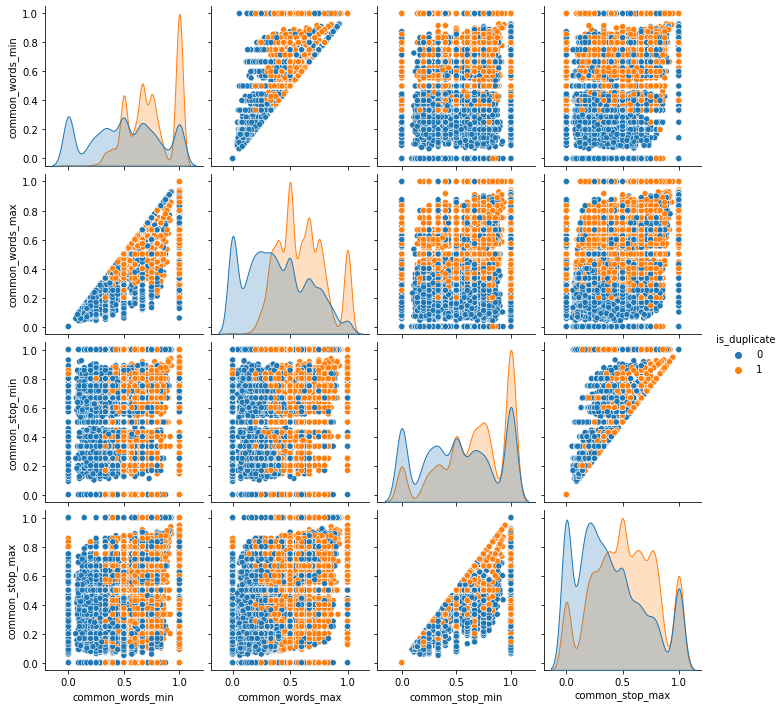

In [ ]:
import seaborn as sns 

sns.pairplot(basic_data[['common_words_min', 'common_words_max','common_stop_min', 'common_stop_max', 'is_duplicate']],hue='is_duplicate')

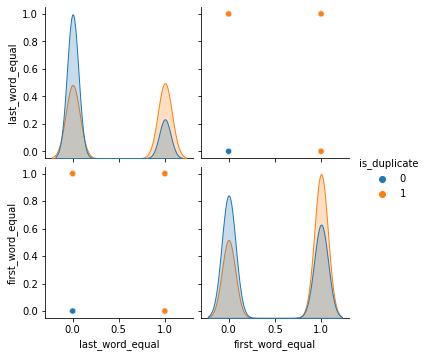

In [ ]:
sns.pairplot(basic_data[['last_word_equal', 'first_word_equal', 'is_duplicate']],hue='is_duplicate')

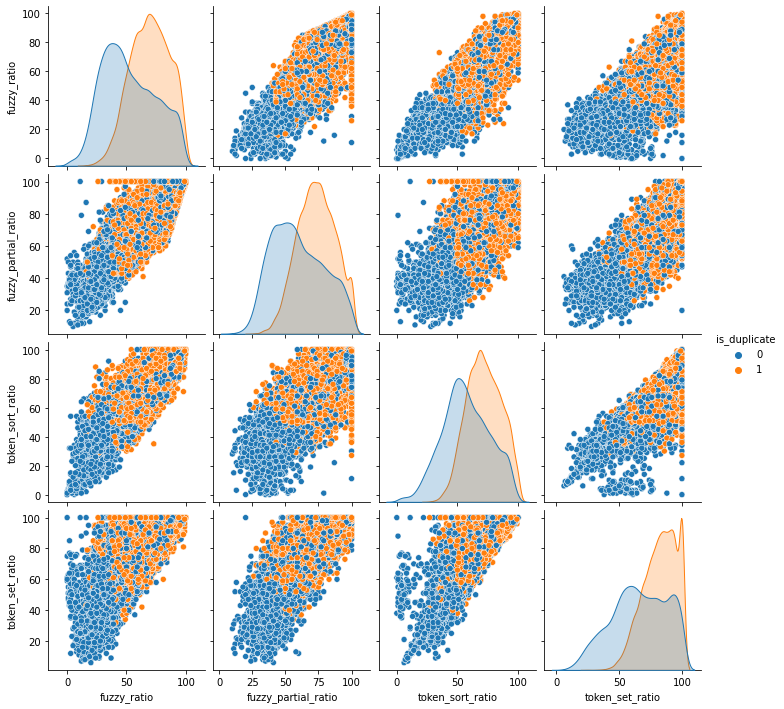

In [ ]:
sns.pairplot(basic_data[['fuzzy_ratio','fuzzy_partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
basic_data.columns[13:]

Index(['common_words_min', 'common_words_max', 'common_stop_min',
       'common_stop_max', 'common_token_min', 'common_token_max',
       'last_word_equal', 'first_word_equal', 'abs_length', 'mean_length',
       'longest_substring_ratio', 'fuzzy_ratio', 'fuzzy_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,shared_words,common_words_min,common_words_max,...,common_token_max,last_word_equal,first_word_equal,abs_length,mean_length,longest_substring_ratio,fuzzy_ratio,fuzzy_partial_ratio,token_sort_ratio,token_set_ratio
297020,0,41,48,8,9,5,17,0.29,0.749981,0.599988,...,0.555549,1.0,1.0,1.0,8.5,0.47619,83,79,79,83


In [ ]:
questions = basic_data[['question1','question2']]
questions.head()

,question1,question2
297020,What is the best short story ever written?,What are the best short stories you have written?
16205,How many calories should I consume each day fo...,How many calories per day should I eat to lose...
228099,Where is the best US website to buy single mal...,What is the best website to buy Single Malt Sc...
293071,How is the work culture?,How is work culture?
206598,Why did slavery happen?,How does slavery happen?


In [ ]:
basic_data = basic_data.drop(columns=['id','qid1','qid2','question1','question2'])
basic_data.head()

,is_duplicate,q1len,q2len,q1_no_words,q2_no_words,common_words,total_words,shared_words,common_words_min,common_words_max,...,common_token_max,last_word_equal,first_word_equal,abs_length,mean_length,longest_substring_ratio,fuzzy_ratio,fuzzy_partial_ratio,token_sort_ratio,token_set_ratio
297020,0,41,48,8,9,5,17,0.29,0.749981,0.599988,...,0.555549,1.0,1.0,1.0,8.5,0.476190,83,79,79,83
16205,1,59,53,11,11,7,22,0.32,0.666656,0.571420,...,0.636358,0.0,1.0,0.0,11.0,0.333333,70,70,79,82
228099,1,61,57,12,11,10,23,0.43,0.999986,0.874989,...,0.833326,1.0,0.0,1.0,11.5,0.706897,93,93,93,95
293071,1,23,19,5,4,4,9,0.44,0.999950,0.999950,...,0.799984,1.0,1.0,1.0,4.5,0.650000,90,79,90,100
206598,1,22,23,4,4,2,8,0.25,0.999950,0.999950,...,0.499988,1.0,0.0,0.0,4.0,0.652174,80,84,71,80


In [ ]:
questions = list(questions['question1']) + list(questions['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= basic_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= basic_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [ ]:
basic_data = pd.concat([basic_data, temp_df], axis=1)

In [ ]:
basic_data.shape

(25000, 6023)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(basic_data.iloc[:,1:].values,basic_data.iloc[:,0].values,test_size=0.2,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print("The accuracy using Random Forest Classifier is %f" %accuracy_score(y_test,y_pred))

The accuracy using Random Forest Classifier is 0.787200


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred1 = xgb_model.predict(X_test)

print("The accuracy using Random Forest Classifier is %f" % accuracy_score(y_test,y_pred1))

The accuracy using Random Forest Classifier is 0.762800


In [ ]:
import pickle

pickle.dump(rf_model,open('rf_model_20k.pkl','wb'))
pickle.dump(xgb_model,open('cv_model_20k.pkl','wb'))